# Analisis de Datos: Sismos Distancia 1000

In [1]:
import sys 
sys.path.append('..')

from framework import Framework
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/dataset50.csv')
df

,0,1,2,3,4,5
0,1008,1008,1109,308,1465,1188
1,1008,1109,308,1465,1188,701
2,1109,308,1465,1188,701,618
3,308,1465,1188,701,618,1009
4,1465,1188,701,618,1009,126
...,...,...,...,...,...,...
4884,856,584,1008,1049,730,1008
4885,584,1008,1049,730,1008,276
4886,1008,1049,730,1008,276,1035
4887,1049,730,1008,276,1035,1035


In [3]:
fw = Framework(
    dataframe  = df,
    inputs     = ['{}'.format(i) for i in range(5)],
    target     = '5',
    save_dir   = "Modelos",
    test_size  = 0.15,
    random_state=0
)
hidden_layers = (5,200,150,100,50)
max_iter = 150

#mlp_model = "mlp_1.17,1.14"
#sequential_model = "sequential_1.16,1.13"

#fw.load_mlp_model(mlp_model)
#fw.load_sequential_model(sequential_model)

In [4]:
fw.get_svm_model()
print("SVM RMSE:",fw.get_svm_rmse())

SVM RMSE: (402.82051893140886, 365.41472551201565)


In [5]:
fw.get_mlp_model(hidden_layers=hidden_layers,max_iter=max_iter)
print("MLP RMSE:",fw.get_mlp_rmse())

MLP RMSE: (377.68361094989376, 350.89971131048156)


/mnt/d/GitHub/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
#fw.save_mlp_model('mlp_distancia_1000')

In [7]:
fw.get_sequential_model(hidden_layers=hidden_layers, epochs=max_iter)
print("Sequential RMSE:",fw.get_sequential_rmse())

Sequential RMSE: (382.53488993833844, 352.94973159587653)


In [8]:
#fw.save_sequential_model('sequential_distancia_1000')

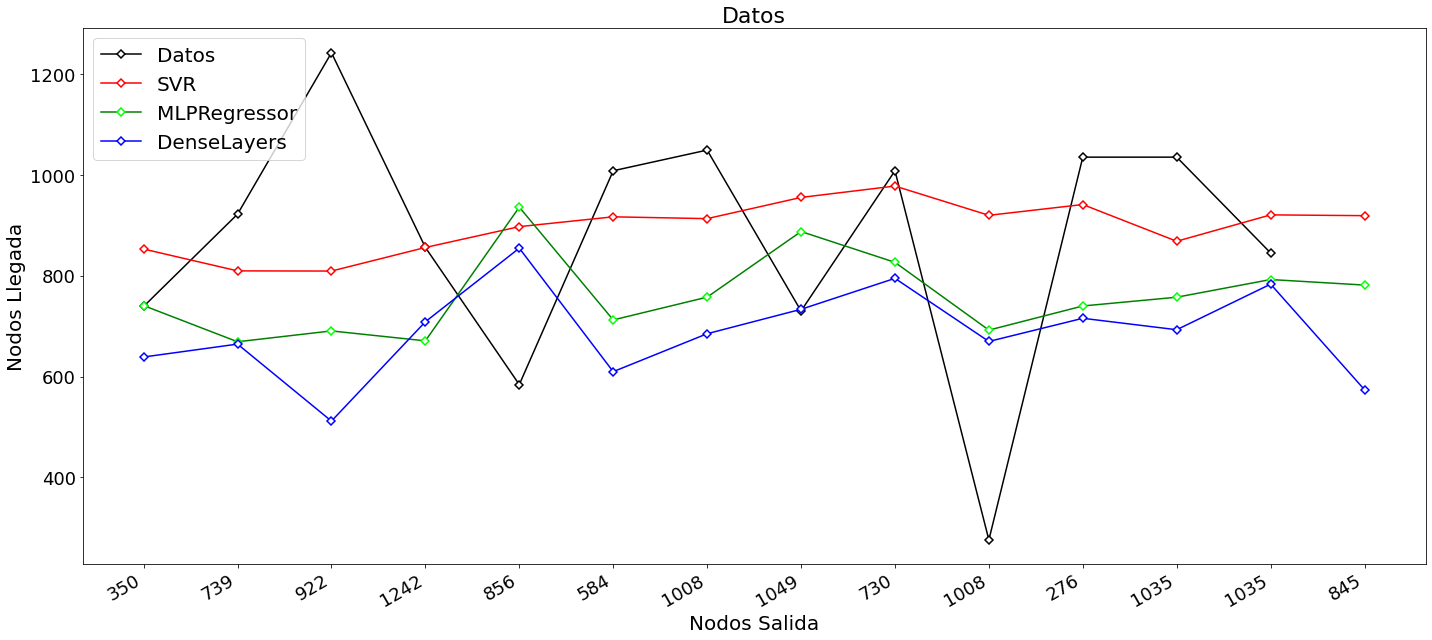

In [10]:
fw.plot_compare_nodes(
    'Graficas/modelos_distancia50.png',
    start_offset = 4880,
    end_offset   = 4894,
    x_label="Nodos Salida",
    y_label="Nodos Llegada",
    figsize=(20,9),
    title_fontsize = 22,
    label_fontsize = 20,
    legend_fontsize = 20,
    ticks_fontsize = 18,
)